In [ ]:
!pip install langchain
!pip install openai

In [ ]:
!pip install langchain_community

In [ ]:
from langchain.document_loaders import UnstructuredFileLoader
from langchain.chains.summarize import load_summarize_chain
from langchain.chains.question_answering import load_qa_chain

In [ ]:
!pip install tiktoken

In [ ]:
!pip install PyPDF2

In [ ]:
!pip install python-docx

In [ ]:
from PyPDF2 import PdfReader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
# from langchain.vectorstores import FAISS

In [ ]:
#this is a function that will read pdf

def pdf_reader(file):
  pdfreader = PdfReader(file);
  text = ''
  for i, page in enumerate(pdfreader.pages):
    content = page.extract_text()
    if content:
      text = text + content
  text = text.replace('\n', ' ')
  return text

In [ ]:
import pandas as pd

In [ ]:
# functions to read XLSX and CSV files

def excel_reader(file):
  df = pd.read_excel(file)
  return df.to_string()

def csv_reader(file):
  df = pd.read_csv(file)
  return df.to_string()

In [ ]:
#function to read DOC files

from docx import Document

def doc_reader(file):
  doc = Document(file)
  content = []
  for paragraph in doc.paragraphs:
    content.append(paragraph.text)

  con = ''.join(content)
  return con

In [ ]:
# finding out the file extension
def file_reader(file):

  split = os.path.splitext(file)
  file_extension = split[1]

  if file_extension == '.pdf':
    return pdf_reader(file)
  elif file_extension == 'xlsx':
    return excel_reader(file)
  elif file_extension == '.csv':
    return csv_reader(file)
  elif file_extension == '.docx':
    return doc_reader(file)
  else:
    return 'File type not supported'

In [ ]:
import os
import openai

openai.api_key =  "<OPENAI-API-KEY>"

In [ ]:
def create_code(prompt):
    response = openai.completions.create(
        model = 'gpt-3.5-turbo-instruct',
        prompt = prompt,
        temperature = 0.9,
        max_tokens = 250,
        top_p = 1,
        frequency_penalty = 0,
        presence_penalty = 0.5
    )

    answer = response.choices[0].text
    return answer

In [ ]:
from math import *

def execute_code(code):
  ans = exec(code)
  return ans

Putting everything together

In [ ]:
user_prompt = input('User prompt: ')

text = file_reader('test file.pdf')
prompt = user_prompt + '\n' + text

prompt = prompt.replace('\n', ': ')

required_code = create_code(prompt)
print(required_code)


User prompt: Write a python code to execute this


# Define a function to check if a number is prime
def is_prime(num):
  # Check if number is equal to or less than 1
  if num <= 1:
    return False
    
  # Check if number is equal to 2
  if num == 2:
    return True

  # Check if number is divisible by any number between 2 and its square root
  for i in range(2, int(num**0.5)+1):
    if num % i == 0:
      return False
      
  # If none of the above conditions are met, the number is prime
  return True
  
# Loop through numbers from 1 to 100
for i in range(1, 101):
  # Check if number is prime using the is_prime function
  if is_prime(i):
    # If number is prime, print it
    print(i, end=' ')


In [ ]:
answer = execute_code(required_code)
print(answer)

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 None


In [ ]:
# this is to check for docx files

text = file_reader('test file doc.docx')

user_prompt = input('User prompt: ')
prompt = user_prompt + '\n' + text

prompt = prompt.replace('\n', ': ')

prompt

User prompt: Write a python code for this that takes user input wherever required


'Write a python code for this that takes user input wherever required: Print Hello, then user name, then user country, then user company based on user input.'

In [ ]:
required_code = create_code(prompt)
print(required_code)



print("Hello!")

user_name = input("Please enter your name: ")
print("Your name is:", user_name)

user_country = input("Please enter your country: ")
print("You are from:", user_country)

user_company = input("Please enter your company name: ")
print("You work for:", user_company)


In [ ]:
answer = execute_code(required_code)
print(answer)

Hello!
Please enter your name: Jayatee
Your name is: Jayatee
Please enter your country: India
You are from: India
Please enter your company name: Tensorblue
You work for: Tensorblue
None


In [ ]:
df = file_reader('test file csv.csv')
df

'        Month  Expenses\n0     January     50000\n1    February     12000\n2       March     28360\n3       April     72550\n4         May     74650\n5        June     11220\n6        July     34002\n7      August     78660\n8   September     23090\n9     October     45022\n10   November     53000\n11   December     10000'

In [ ]:
user_prompt = input('User prompt: ')
prompt = user_prompt + '\n' + df

prompt = prompt.replace('\n', ': ')

prompt

User prompt: Write a python code to plot the following data


'Write a python code to plot the following data:         Month  Expenses: 0     January     50000: 1    February     12000: 2       March     28360: 3       April     72550: 4         May     74650: 5        June     11220: 6        July     34002: 7      August     78660: 8   September     23090: 9     October     45022: 10   November     53000: 11   December     10000'

In [ ]:
required_code = create_code(prompt)
print(required_code)




import matplotlib.pyplot as plt

# Define the data points for months and expenses
months = ["January", "February", "March", "April", "May", "June", "July",
          "August", "September", "October", "November", "December"]
expenses = [50000, 12000, 28360, 72550, 74650, 11220, 34002, 78660,
            23090, 45022, 53000, 10000]

# Create a bar plot with x-axis as months and y-axis as expenses
plt.bar(months, expenses, color="orange")

# Add labels and title to the plot
plt.xlabel("Month")
plt.ylabel("Expenses")
plt.title("Monthly Expenses Report")

# Display the plot
plt.show()


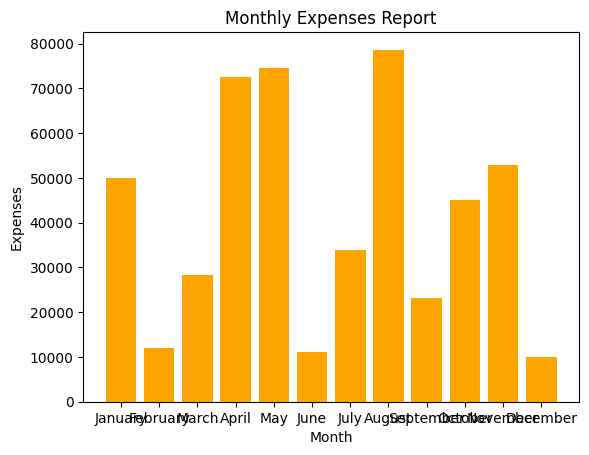

None


In [ ]:
answer = execute_code(required_code)
print(answer)